<a href="https://colab.research.google.com/github/vinayakrajurs/stroke_pred_EDA/blob/main/stroke_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.available
style.use("seaborn-deep")

In [ ]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.shape

(5110, 12)

#Data cleaning

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
from scipy.stats import norm, skew

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


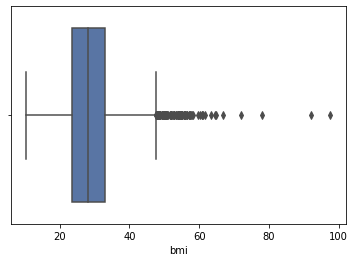

In [ ]:
sns.boxplot(data.bmi)

In [ ]:
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
import  random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


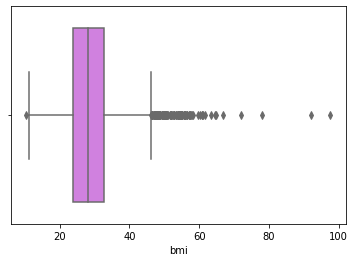

In [ ]:
sns.boxplot(data.bmi,color = randomcolor())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


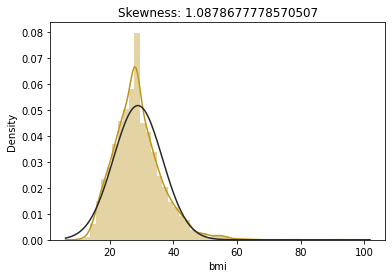

In [ ]:
skewness = skew(data.bmi)
sns.distplot(data.bmi, fit = norm, color = randomcolor())
plt.title("Skewness: "+str(skewness))
plt.show()

Since skewness is almost 1, we can assume normal distributionIn a normal distribution, 99.7% of the data is contained within +-3 SD of the mean. We can use this to cut down on outliers.


In [ ]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  16
smoking_status        0
stroke                0
dtype: int64

Input values by median

In [ ]:
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Let us repeat the process until few outliers are left

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


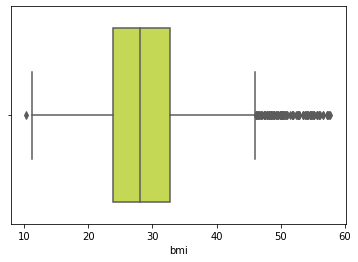

In [ ]:
sns.boxplot(data.bmi,color = randomcolor())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


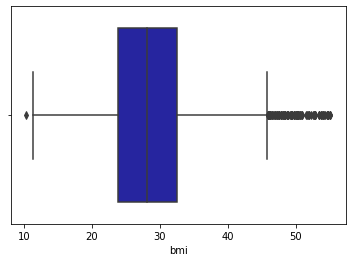

In [ ]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

In [ ]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
data.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
data.work_type.value_counts()


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
data.Residence_type.value_counts()


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#Exploratory Data Analysis

In [ ]:
from scipy.stats import norm, skew

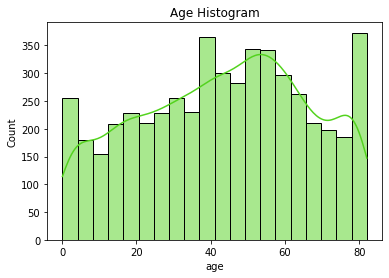

In [ ]:
sns.histplot(data=data, x="age", kde=True,color = randomcolor())
plt.title("Age Histogram")
plt.show()

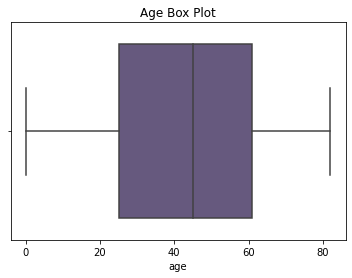

In [ ]:
sns.boxplot(data=data, x="age",color = randomcolor())
plt.title("Age Box Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


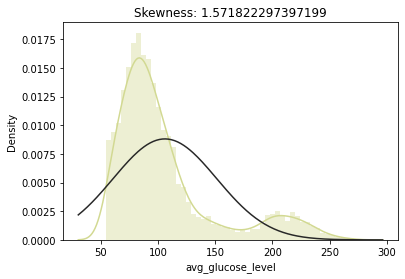

In [ ]:
skewness = skew(data.avg_glucose_level)
sns.distplot(data.avg_glucose_level, fit = norm, color = randomcolor())
plt.title("Skewness: "+str(skewness))
plt.show()

<Figure size 2160x720 with 0 Axes>

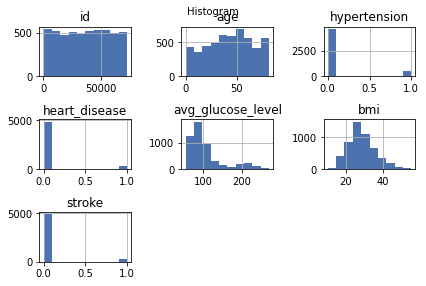

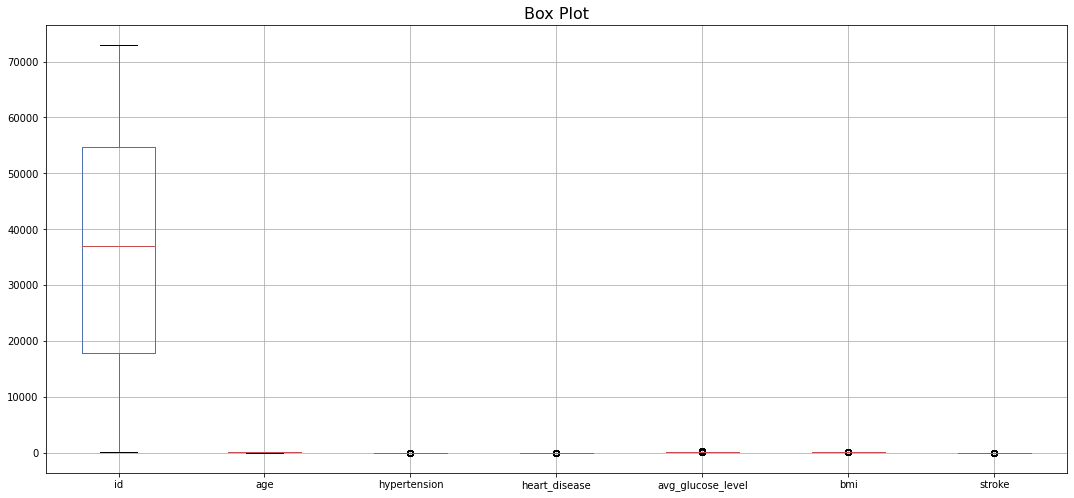

In [ ]:
plt.figure(figsize=(30,10))
data.hist() # plot histogram
plt.suptitle("Histogram", fontsize=10) # use subtitle to add title to all sublots
plt.tight_layout(pad=1)
plt.show()
data.boxplot(figsize =(15,7)) # plot boxplot
plt.title("Box Plot", fontsize=16)
plt.tight_layout(pad=1)
plt.show()

In [ ]:
corr = data.corr()
print(corr)


                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.008521  0.349209      0.145808       0.046529   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.008521  0.006388  
age                         0.238171  0.349209  0.245257  
hypertension                0.174474  0.145808  0.127904  
heart_disease               0.161857  0.046529  0.134914  
avg_glucose_level           1.000000  0.174292  0.131945  
bmi                         0.174292  1.000000  0.041695  
stroke                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


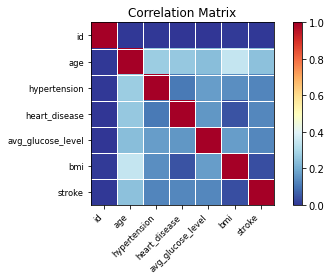

In [ ]:
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Text(0.5, 0.98, 'Pair Plot')

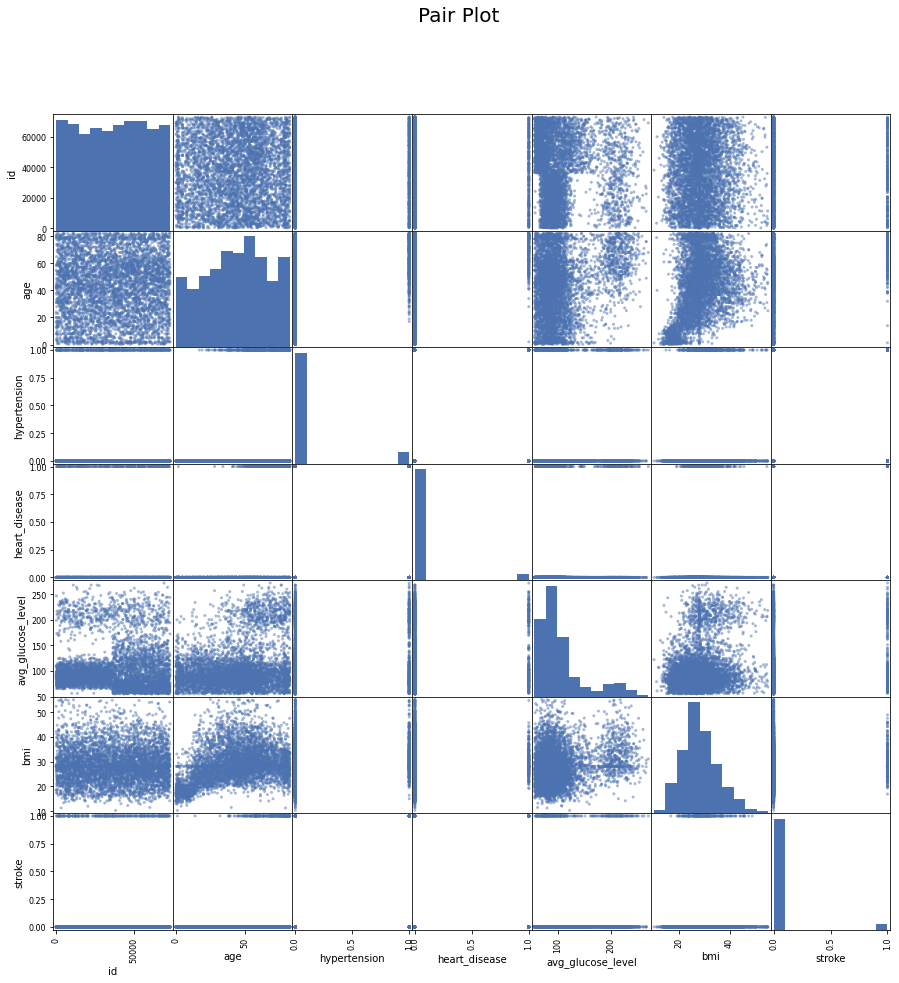

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(15,15))
plt.suptitle("Pair Plot", fontsize=20)
plt.Text(0.5, 0.98, 'Pair Plot')


**Visualisation of categorical data**

In [ ]:
sns.pairplot(train,hue='stroke',palette = "coolwarm")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


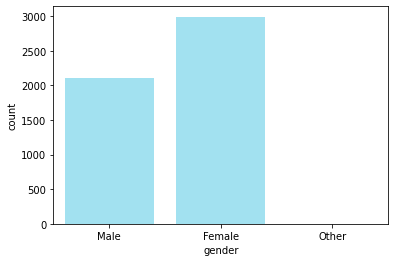

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


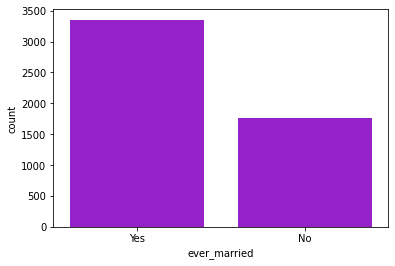

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


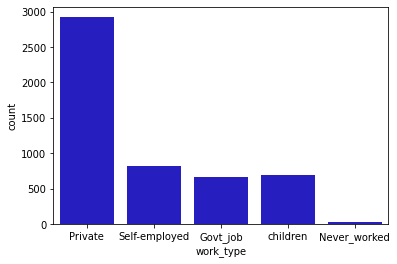

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


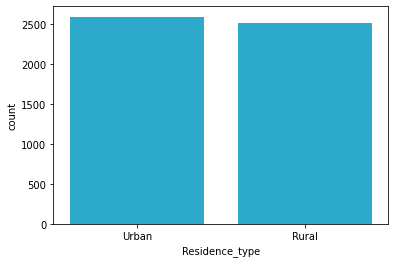

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


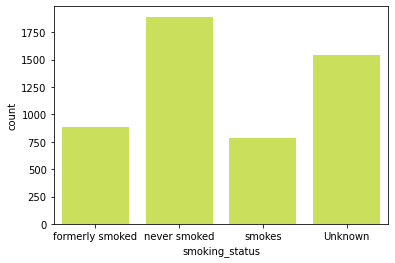

In [ ]:
for x in data.select_dtypes(include=['object']).columns:
    sns.countplot(data[x],color = randomcolor())
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


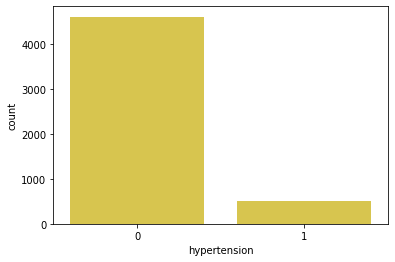

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


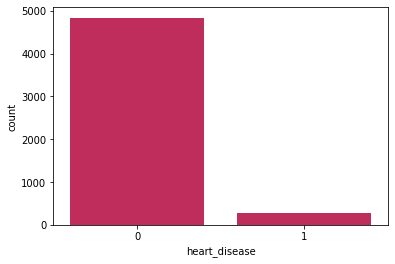

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


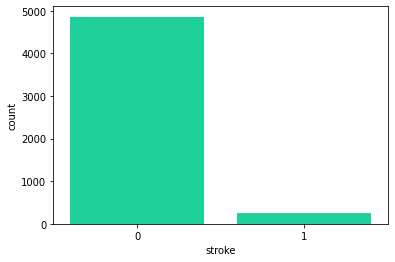

In [ ]:
for x in ['hypertension','heart_disease','stroke']:
    sns.countplot(data[x],color = randomcolor())
    plt.show()

Here we can observe that compared to non-stroke patients , stroke patients data is less .Hence, our data can be considered to be  imbalanced.

**Visualization of stroke patients to gather** **insights**

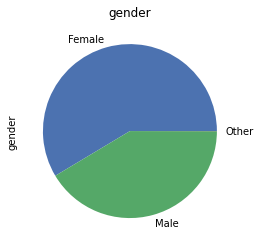

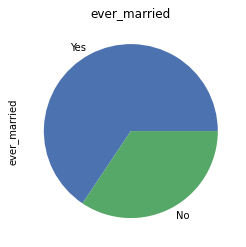

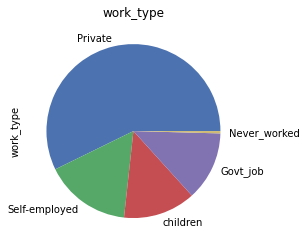

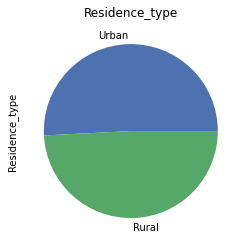

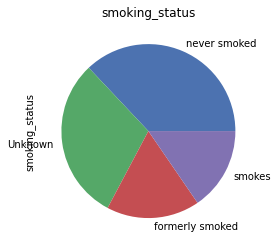

In [ ]:
stroke_positive_data = data[data['stroke']==1]
for x in stroke_positive_data.select_dtypes(include=['object']).columns:
    data[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

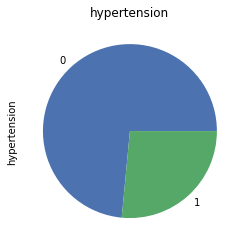

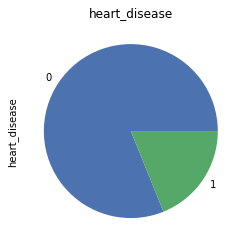

In [ ]:
for x in ['hypertension','heart_disease']:
    stroke_positive_data[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

Observations:
We can see many interesting observations here, some of of which are going against established viewpoints. Eg.
1)People who don't smoke have a higher risk of getting a stroke
compared to smokers.

2)People who don't have hypertension or heart disease have a higher risk of stroke compared to hypertensive and heart patients. Hence, unlike what we commonly believe, we can't take hypertension,smoking history and heart disease history to be definite predictors of stroke. #### Other observations are:

3)Proportion of females among stroke patients is higher than males.

4)People who are married have a higher risk of stroke compared to unmarried people.

5)People living in urban areas have a higher risk of contracting a stroke compared to those in rural areas.

6)People working in private jobs have a higher risk of contracting a stroke compared to those working in the public sector.

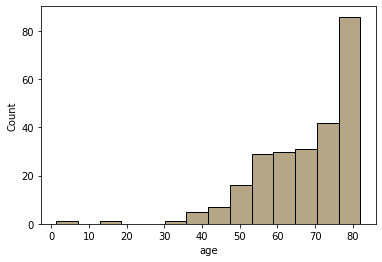

In [ ]:
sns.histplot(stroke_positive_data['age'],color = randomcolor())
plt.show()

**Observation:**

Older people, especially those aged 80 and above have a higher risk of stroke

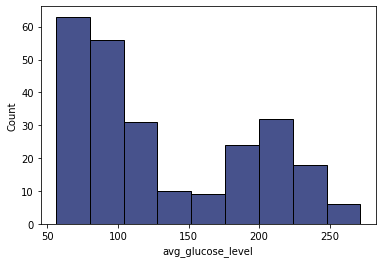

In [ ]:
sns.histplot(stroke_positive_data['avg_glucose_level'],color = randomcolor())
plt.show()

Contrary to popular opinion, this dataset shows that most people having a stroke have an average glucose level of 100 mg/dl or less.

**Resampling**

As observed before, we have an imbalanced dataset. We'll correct it by using the resample module offered by sklearn.

In [ ]:
from sklearn.utils import resample

In [ ]:
#create two different dataframe of majority and minority class 
df_majority = data[(data['stroke']==0)] 
df_minority = data[(data['stroke']==1)] 
df_majority.shape,df_minority.shape

((4861, 12), (249, 12))

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4861, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(4861, 12)

In [ ]:
data_upsampled = pd.concat([df_minority_upsampled, df_majority])
data_upsampled.shape

(9722, 12)

In [ ]:
data_upsampled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
102,45277,Female,74.0,0,0,Yes,Private,Rural,231.61,34.6,formerly smoked,1
179,65105,Male,81.0,0,0,Yes,Private,Urban,213.22,26.1,Unknown,1
92,66315,Female,57.0,0,0,No,Self-employed,Urban,68.02,37.5,never smoked,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
106,42072,Female,50.0,1,0,Yes,Private,Rural,73.18,30.3,formerly smoked,1


**Data Preparation**

In [ ]:
#importing required modules
from sklearn.preprocessing import OneHotEncoder

In [ ]:
del data_upsampled["id"]

In [ ]:
categorical = data_upsampled.select_dtypes(include=['object'])
non_categorical = data_upsampled.select_dtypes(exclude=['object'])

In [ ]:
categorical.dtypes


gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [ ]:
non_categorical.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

**getting dummy variables for the categorical data**

In [ ]:
dummies = pd.get_dummies(data_upsampled[categorical.columns])
dummies.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
102,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
179,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
92,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
14,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
106,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
dummified_data = pd.concat([data_upsampled,dummies],axis = 1)
for x in categorical.columns:
        del dummified_data[x]
dummified_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
102,74.0,0,0,231.61,34.6,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
179,81.0,0,0,213.22,26.1,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
92,57.0,0,0,68.02,37.5,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
14,79.0,0,1,214.09,28.2,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
106,50.0,1,0,73.18,30.3,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


**Test train split and standardization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
Y = dummified_data.stroke
X = dummified_data.drop("stroke",axis = 1)
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

**Model Training**

Since it is a classification project, we will train multiple Logistic Regression, Decision Tree and Random Forest Models on the data and select the best performing model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

#Logistic Reggression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy 75.39%
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1401
           1       0.77      0.75      0.76      1516

    accuracy                           0.75      2917
   macro avg       0.75      0.75      0.75      2917
weighted avg       0.75      0.75      0.75      2917



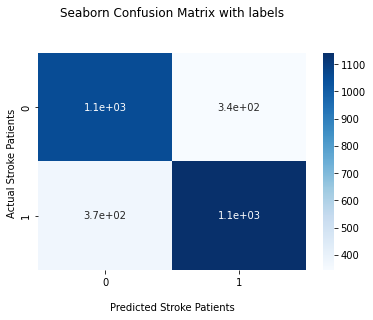

In [ ]:
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))
# Display the Confusion Matrix and Classification Report
cf_matrix = confusion_matrix(logreg_prediction, Y_test)
print(classification_report(logreg_prediction, Y_test))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Stroke Patients')
ax.set_ylabel('Actual Stroke Patients ');
plt.show()

#Random Forest

Accuracy 98.94%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1400
           1       1.00      0.98      0.99      1517

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



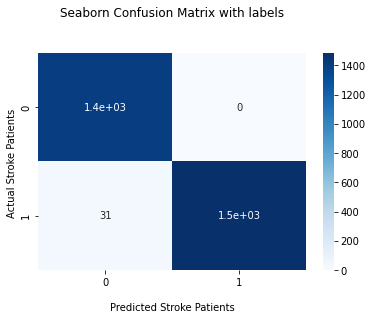

In [ ]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))
# Display the Confusion Matrix and Classification Report
cf_matrix = confusion_matrix(ranfor_prediction, Y_test)
print(classification_report(ranfor_prediction, Y_test))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Stroke Patients')
ax.set_ylabel('Actual Stroke Patients ');
plt.show()

#KNN CLASSIFIER

Accuracy 91.98%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1197
           1       1.00      0.86      0.93      1720

    accuracy                           0.92      2917
   macro avg       0.92      0.93      0.92      2917
weighted avg       0.93      0.92      0.92      2917



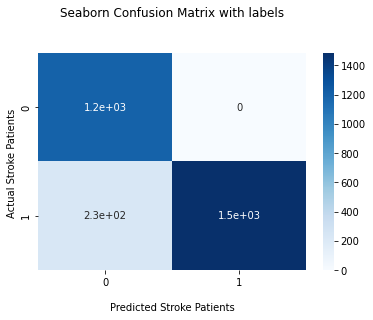

In [ ]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, Y_test)))
# Display the Confusion Matrix and Classification Report
cf_matrix = confusion_matrix(knn_prediction, Y_test)
print(classification_report(knn_prediction, Y_test))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Stroke Patients')
ax.set_ylabel('Actual Stroke Patients ');
plt.show()

#SVM

Accuracy 74.46%
[[1018  332]
 [ 413 1154]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1350
           1       0.78      0.74      0.76      1567

    accuracy                           0.74      2917
   macro avg       0.74      0.75      0.74      2917
weighted avg       0.75      0.74      0.74      2917



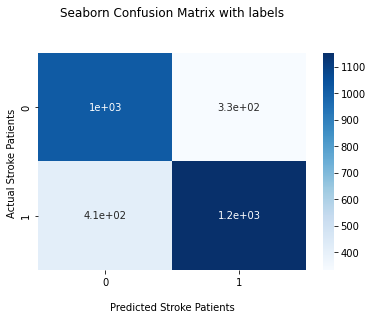

In [ ]:
# Fit (train) the Support Vector Machine classifier
import seaborn as sns
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))
# Display the Confusion Matrix and Classification Report
cf_matrix= confusion_matrix(svm_prediction, Y_test)
print(cf_matrix)
print(classification_report(svm_prediction, Y_test))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Stroke Patients')
ax.set_ylabel('Actual Stroke Patients ');
plt.show()

#Decision Tree

Accuracy 97.60%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1361
           1       1.00      0.96      0.98      1556

    accuracy                           0.98      2917
   macro avg       0.98      0.98      0.98      2917
weighted avg       0.98      0.98      0.98      2917



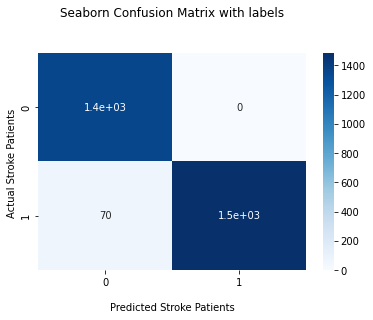

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_prediction = dtc.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(dtc_prediction, Y_test)))
# Display the Confusion Matrix and Classification Report
cf_matrix = confusion_matrix(dtc_prediction, Y_test)
print(classification_report(dtc_prediction, Y_test))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Stroke Patients')
ax.set_ylabel('Actual Stroke Patients ');
plt.show()

Accuracy of Random Forest model prediction is more and hence it is best model